# MACHINE LEARNING WITH SCIKIT-LEARN

# Partie III : $k$ plus proches voisins ($k$-means) & validation croisée

Dans cette partie III nous allons apprendre à manipuler : 
1. la classe **KNeighborsClassifier** qui permet de réaliser de la classification par la méthode des $k$ plus proches voisins ou $k$-means , 
2. les fonctions **cross_val_score**  et **cross_val_predict** qui permettent de réaliser des expériences de validation croisée.

Dans les parties I et II de cette chaine d'articles, nous avons abordé respectivement les régressions linéaires et polynomiales et l'analyse en composante principale (ACP) que je vous conseille à y regarder.

Nous travaillerons pour cela sur le jeu de données **breast cancer** que l'on peut [charger à partir de scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer) et dont on trouve un descriptif sur le [site de l'UCI](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic).

Nous apprendrons également l'importance de standardiser les descripteurs avec les $k$ plus proches voisins.

## 1. Charger le jeu de données en utilisant la fonction *load_breast_cancer*  du module *datasets*. En extraire le nombre d'observations et de descripteurs disponibles et représenter sous la forme d'un diagramme en bâton (barplot) les effectifs par classe. 

Pour représenter les effectifs on pourra par exemple s'appuyer sur la fonction [*bincount*](https://docs.scipy.org/doc/numpy/reference/generated/numpy.bincount.html) du package NumPy et sur la fonction [*bar*](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html) du package MatPlotlib.

In [1]:
# generic imports #
#-----------------#
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# load dataset #
#--------------#
from sklearn.datasets import load_breast_cancer
db = load_breast_cancer()
print(db.DESCR)
X = db.data
y = db.target
class_ids = db.target_names
n = X.shape[0]
p = X.shape[1]
K = len(class_ids)
print('load dataset of size %d x %d involving %d classes' % (n,p,K))

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

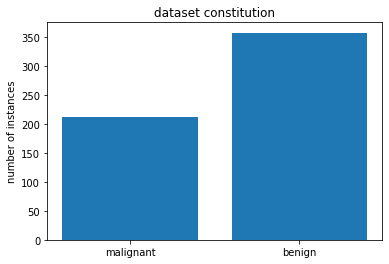

In [3]:
# show dataset constitution #
#---------------------------#
counts = np.bincount(y)
plt.bar(range(K), counts)
plt.ylabel('number of instances')
plt.title('dataset constitution')
plt.xticks(range(K), class_ids)
plt.show()

## 2. Estimer les performances de classification de l'algorithme des $k$-means par validation croisée pour $k \in \{1,3,5,7\}$ et en considérant  10 folds. Quel est l'intérêt d'utiliser un nombre impair de voisins ?

on utilisera pour cela la classe [*KNeighborsClassifier*](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) du module *neighbors* et la fonction [*cross_val_score*](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) du module *model_selection*.

In [8]:
# carry out cross-validation using cross_val_score #
#--------------------------------------------------#
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

k_list = [1,3,5,7]
res = []

for i in range(len(k_list)):
    knn = KNeighborsClassifier(n_neighbors=k_list[i])
    res.append(cross_val_score(knn, X, y, cv = 10) )
    
# results
print(res)
    

[array([0.93103448, 0.84482759, 0.92982456, 0.92982456, 0.9122807 ,
       0.89473684, 0.92982456, 0.94642857, 0.89285714, 0.94642857]), array([0.9137931 , 0.86206897, 0.89473684, 0.94736842, 0.94736842,
       0.94736842, 0.96491228, 0.94642857, 0.91071429, 0.92857143]), array([0.9137931 , 0.87931034, 0.89473684, 0.96491228, 0.94736842,
       0.92982456, 0.96491228, 0.92857143, 0.91071429, 0.96428571]), array([0.93103448, 0.86206897, 0.9122807 , 0.96491228, 0.92982456,
       0.92982456, 0.96491228, 0.92857143, 0.91071429, 0.94642857])]


##  3. La fonction *cross_val_score* calcule la performance de prédiction obtenue dans les différentes folds. Représenter par un "boxplot" la distribution des performances obtenues par fold pour les différentes valeurs de $k$, et sélectionner la valeur de $k$ conduisant à la meilleure performance médiane.

On pourra s'appuyer sur la fonction [*boxplot*](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.boxplot.html#matplotlib.pyplot.boxplot) du package MatplotLib. Elle permet de tracer sur un même graphique plusieurs boxplot à partir d'une matrice ou d'une liste.

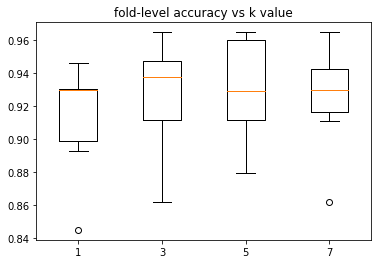

best k value obtained = 3


In [9]:
# compare performance obtained #
#------------------------------#
plt.boxplot(res, labels = k_list)
plt.title('fold-level accuracy vs k value')
plt.show()
# select optimal k value #
#------------------------#
ind_best = np.argmax( np.median(res, 1) )
k_best = k_list[ind_best]
print('best k value obtained = %d' % k_best)

## 4. Pour avoir une vision plus détaillée des résultats de classification il peut-être intéressant de calculer une matrice de confusion. La fonction [*cross_val_predict*](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) du module *model_selection* permet de réaliser une expérience de validation croisée en fournissant les prédictions "brutes" plutôt qu'une mesure de performance de classification. 

Utiliser cette fonction pour la valeur de $k$ retenue précédemment et calculer la matrice de confusion obtenue en utilisant la fonction [*confusion_matrix*](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) du module *metrics*. Utilisez la fonction [*classification_report*](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) du module *metrics* pour calculer les indicateurs usuels que l'on peut déduire de cette matrice de confusion.

In [10]:
# get cross-validation predictions & show confusion matrix #
#----------------------------------------------------------#
# get predictions
from sklearn.model_selection import cross_val_predict
knn = KNeighborsClassifier(n_neighbors=k_best)
cv_preds = cross_val_predict(knn, X, y, cv = 10)
# compute confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, cv_preds))
# show "classification report"
from sklearn.metrics import classification_report
print(classification_report(y, cv_preds))

[[185  27]
 [ 15 342]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       212
           1       0.93      0.96      0.94       357

    accuracy                           0.93       569
   macro avg       0.93      0.92      0.92       569
weighted avg       0.93      0.93      0.93       569



## 5. Reprendre cette analyse en standardisant au préalable les descripteurs

On pourra par exemple utiliser la classe [*StandardScaler*](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) du module *preprocessing* pour standardiser les descripteurs.


In [11]:
# do the same from scaled data #
#------------------------------#
# scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
# carry out cross-validation
res_scale = []
for i in range(len(k_list)):
    knn = KNeighborsClassifier(n_neighbors=k_list[i])
    res_scale.append( cross_val_score(knn, X_norm, y, cv = 10) )
# pick best model
ind_best = np.argmax(np.median(res_scale,1))
k_best = k_list[ind_best]
knn = KNeighborsClassifier(n_neighbors=k_best)
# get predictions
cv_preds = cross_val_predict(knn, X_norm, y, cv = 10)
# show results
print(confusion_matrix(y, cv_preds))
print(classification_report(y, cv_preds))


[[197  15]
 [  4 353]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       212
           1       0.96      0.99      0.97       357

    accuracy                           0.97       569
   macro avg       0.97      0.96      0.96       569
weighted avg       0.97      0.97      0.97       569

